In [98]:
import pandas as pd
import numpy as np
from sklearn import metrics, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.formula.api as smf
from scipy import stats
import warnings
import matplotlib.pyplot       as plt
import seaborn                 as sns
warnings.filterwarnings('ignore')

Loading the full celular dataset

In [2]:
df_all = pd.read_csv('../data/celular_data.csv', dtype={'gtin':'str'})
df_all['date'] = pd.to_datetime(df_all['date'])

Range of dates

In [3]:
date_min = df_all['date'].min()
print(date_min)
date_max = df_all['date'].max()
print(date_max)
n_days_total =  len(df_all['date'].unique())
print(n_days_total)

2017-06-30 00:00:00
2020-02-28 00:00:00
974


In [4]:
df_all.columns

Index(['Unnamed: 0', 'date', 'competition_price', 'gtin', 'item_name',
       'enable_subsidy', 'gmv', 'revenue', 'cogs', 'gross_profit',
       'total_discount', 'orders', 'olist_price', 'freight_value',
       'commission_freight', 'commission_product', 'price_freight_shift',
       'price_discount', 'stock_max', 'stock_min', 'stock_avg', 'price_max',
       'price_min', 'price_avg', 'offer_max', 'offer_min', 'offer_avg',
       'product_type'],
      dtype='object')

Orders over time

Text(0.5, 1.0, 'orders when stocks > 0')

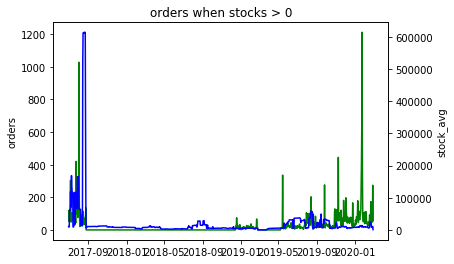

In [5]:
y_1 = df_all.groupby('date')['orders'].sum()
y_2 = df_all.groupby('date')['stock_avg'].sum()
x_data = df_all['date'].unique()



sns.lineplot(x = x_data, y = y_1, color = 'g')
ax2 = plt.twinx()
sns.lineplot(x = x_data, y = y_2, color = 'b')
plt.title('orders when stocks > 0')

Histogram of orders show a lot of days with 0 orders

Text(0.5, 1.0, 'histogram of all orders in electronics')

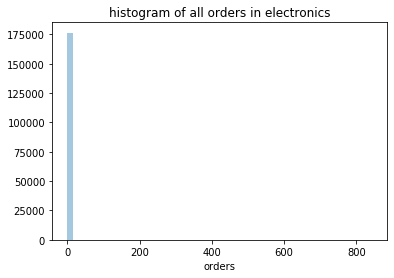

In [6]:
sns.distplot(df_all['orders'], kde=False)
plt.title('histogram of all orders in electronics')

In [7]:
df_all.describe()

,Unnamed: 0,competition_price,gmv,revenue,cogs,gross_profit,total_discount,orders,olist_price,freight_value,...,price_discount,stock_max,stock_min,stock_avg,price_max,price_min,price_avg,offer_max,offer_min,offer_avg
count,176635.000000,79946.000000,176635.000000,176635.000000,176635.000000,176635.000000,6937.000000,176635.000000,176635.000000,6937.000000,...,6937.000000,176635.000000,176635.000000,176635.000000,176635.000000,176635.000000,176635.000000,176635.000000,176635.000000,176635.000000
mean,269.384103,591.383087,52.345405,8.798125,5.928534,2.869592,1.616838,0.139282,800.429556,18.107616,...,0.434717,116.086110,94.141365,104.912985,882.251153,865.243644,875.090319,817.003521,786.208763,801.409793
std,221.952845,597.010315,667.463276,105.863339,74.539369,32.818711,11.139193,3.357730,793.222036,18.965560,...,3.412801,2164.296401,2010.051213,2048.527386,864.997935,855.333535,859.493753,807.186346,783.112854,793.169206
min,0.000000,10.000000,0.000000,0.000000,0.000000,-506.220000,0.000000,0.000000,5.562500,0.000000,...,0.000000,0.000000,0.000000,0.000000,10.990000,10.990000,10.990000,10.000000,10.000000,10.000000
25%,89.000000,170.740000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,219.900000,0.000000,...,0.000000,0.000000,0.000000,0.000000,255.210000,250.000000,255.000000,223.900000,218.900000,220.630000
50%,211.000000,369.550000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,517.000000,17.400000,...,0.000000,5.000000,0.000000,2.500000,599.900000,579.000000,599.000000,529.900000,504.900000,518.400000
75%,399.000000,789.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1159.000000,26.510000,...,0.000000,10.000000,5.000000,8.000000,1269.000000,1235.000000,1254.500000,1187.990000,1110.780000,1159.000000
max,990.000000,4049.900000,129229.500000,19384.430000,14215.420000,5169.010000,269.900000,842.000000,5999.900000,272.680000,...,204.870000,100000.000000,100000.000000,100000.000000,8399.900000,8399.900000,8399.900000,5999.900000,5999.900000,5999.900000


In [8]:
df_all[df_all['orders'] > 0].describe()

,Unnamed: 0,competition_price,gmv,revenue,cogs,gross_profit,total_discount,orders,olist_price,freight_value,...,price_discount,stock_max,stock_min,stock_avg,price_max,price_min,price_avg,offer_max,offer_min,offer_avg
count,6937.000000,4862.000000,6937.000000,6937.000000,6937.000000,6937.000000,6937.000000,6937.000000,6937.000000,6937.000000,...,6937.000000,6937.000000,6937.000000,6937.000000,6937.000000,6937.000000,6937.000000,6937.000000,6937.000000,6937.000000
mean,333.083177,430.693182,1332.857224,224.024346,150.956686,73.067660,1.616838,3.546490,533.144225,18.107616,...,0.434717,277.068618,224.256739,254.170263,657.403415,617.144803,645.999926,571.261975,546.672223,558.103750
std,260.336907,343.110070,3104.580269,487.009989,345.828605,149.328307,11.139193,16.584034,463.267066,18.965560,...,3.412801,3682.409422,3265.356747,3416.268272,544.115850,526.556280,534.623674,487.620941,465.201345,474.581953
min,0.000000,12.890000,23.030000,4.380000,1.530000,-506.220000,0.000000,1.000000,5.562500,0.000000,...,0.000000,0.000000,0.000000,0.000000,12.890000,12.890000,12.890000,12.890000,12.500000,12.825000
25%,128.000000,169.000000,319.690000,57.680000,35.530000,17.090000,0.000000,1.000000,239.900000,0.000000,...,0.000000,9.000000,2.000000,7.000000,299.000000,289.000000,297.571429,262.900000,249.300000,258.143077
50%,272.000000,379.900000,640.270000,112.930000,73.740000,35.990000,0.000000,1.000000,449.900000,17.400000,...,0.000000,33.000000,18.000000,28.000000,599.990000,499.990000,598.488920,489.900000,475.100000,479.900000
75%,486.000000,539.900000,1357.420000,238.280000,155.650000,81.510000,0.000000,2.000000,699.000000,26.510000,...,0.000000,95.000000,77.000000,89.888889,799.900000,789.900000,799.900000,739.900000,699.000000,728.075000
max,990.000000,2699.000000,129229.500000,19384.430000,14215.420000,5169.010000,269.900000,842.000000,4999.000000,272.680000,...,204.870000,99999.000000,99999.000000,99999.000000,5599.000000,5599.000000,5599.000000,4999.000000,4999.000000,4999.000000


In [9]:
df_all[df_all['stock_avg'] > 0].describe()

,Unnamed: 0,competition_price,gmv,revenue,cogs,gross_profit,total_discount,orders,olist_price,freight_value,...,price_discount,stock_max,stock_min,stock_avg,price_max,price_min,price_avg,offer_max,offer_min,offer_avg
count,121548.000000,60245.000000,121548.000000,121548.000000,121548.000000,121548.000000,6767.000000,121548.000000,121548.000000,6767.000000,...,6767.000000,121548.000000,121548.000000,121548.000000,121548.000000,121548.000000,121548.000000,121548.000000,121548.000000,121548.000000
mean,262.580454,530.592040,74.954179,12.578457,8.488830,4.089627,1.629721,0.200357,723.925635,17.995182,...,0.434326,168.697716,136.807352,152.460798,834.689062,813.224704,825.765431,745.729965,706.107474,725.233940
std,228.651346,539.420175,802.474711,127.182674,89.604263,39.371682,11.160692,4.045670,721.892828,18.927350,...,3.447832,2607.344717,2421.899787,2468.019143,835.792590,821.622963,827.940316,744.759525,705.421311,721.935611
min,0.000000,10.000000,0.000000,0.000000,0.000000,-506.220000,0.000000,0.000000,5.562500,0.000000,...,0.000000,1.000000,0.000000,0.111111,10.990000,10.990000,10.990000,10.000000,10.000000,10.000000
25%,76.000000,169.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,195.522500,0.000000,...,0.000000,5.000000,0.000000,2.500000,239.990000,230.000000,239.900000,199.900000,189.990000,197.717143
50%,195.000000,329.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,483.800000,17.327500,...,0.000000,5.000000,3.000000,5.000000,550.000000,529.900000,549.990000,499.000000,478.900000,489.255263
75%,399.000000,739.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,998.960779,26.332500,...,0.000000,19.000000,10.000000,15.000000,1169.900000,1099.900000,1119.900000,999.990000,978.670000,999.000000
max,990.000000,3799.900000,129229.500000,19384.430000,14215.420000,5169.010000,269.900000,842.000000,5999.900000,272.680000,...,204.870000,100000.000000,100000.000000,100000.000000,8399.900000,8399.900000,8399.900000,5999.900000,5999.900000,5999.900000


Number of orders/day (all day in dataset)

In [10]:
sparsity_all_dates = df_all['orders'].sum() / n_days_total
sparsity_all_dates

25.258726899383984

We have some days with orders >1 but stocks = 0

In [11]:
df_all['orders'][df_all['stock_avg'] == 0].sum()

249.0

Number of orders/day when stock_avg >0. It reduces because the number of days without stock but with orders.

In [12]:
sparsity_stocks = df_all['orders'][df_all['stock_avg'] >0].sum() / len(df_all['date'][df_all['stock_avg'] >0].unique())
sparsity_stocks

25.003080082135522

In [13]:
sparcity_orders = df_all['orders'][df_all['orders'] >0].sum() / len(df_all['date'][df_all['orders'] >0].unique())
sparcity_orders 

58.02358490566038

Check the most important products_gtins on the x last_days

In [14]:
#input the number of days to check the most important product in terms of orders.
last_days = 60
check_sales_date = df_all['date'].max() - pd.DateOffset(last_days)

df_all[df_all['date'] >= check_sales_date].groupby(by=['item_name', 'gtin'])['orders'].sum().reset_index().sort_values(by = ['orders'], ascending = False).head(10)

,item_name,gtin,orders
339,Smartwatch Xiaomi Mi Band 4 Oled Preto Origina...,0721047599769,844.0
88,Celular Lg A275 Simples Lanterna Radio Fm Idoso,7893299741364,419.0
114,Celular Motorola Moto E5 Play 16gb Dual Chip -...,7892597347827,402.0
90,Celular Lg B-220 B220 Preto 2 Chips,7909389823503,381.0
201,Samsung Galaxy J2 Core Dual Sim 16 Gb Preto 1 ...,7892509104661,358.0
239,"Smartphone LG K9 TV Azul com 16GB, Tela 5.0 H...",7893299910418,316.0
52,Celular Dual Chip LG B220 32MB 2G Rádio FM .,7893299901607,200.0
111,"Celular Lg K9 Tv Azul Com 16gb, Tela 5.0 Hd, ...",7893299910418,181.0
176,Lg K9 Tv Dual Sim 16 Gb Azul,7893299910418,177.0
240,"Smartphone LG K9 TV Azul com 16GB, Tela 5.0&q...",7893299910418,174.0


TEST PRODUCTS INDIVIDUALLY

In [15]:
#choose gtin
gtin = '7893299910340'
df = df_all[(df_all['gtin'] == gtin)]
print(df['item_name'].unique()[0])

Celular Lg K9 Tv 4g Dual Chip Tv Digital 16gb Tela 5 Cam8mp .


Create some features for seasonality and convert them to dummies

In [16]:
df['month'] = pd.DatetimeIndex(df['date']).month
df['day'] = pd.DatetimeIndex(df['date']).day
df['weekday'] = pd.DatetimeIndex(df['date']).weekday

#Fill the nan freight values by the median (we just have one product here) and nan competition price by olist price
df['freight_value'] = df['freight_value'].fillna(df['freight_value'].median())
df['competition_price'] = df['olist_price'].fillna(df['olist_price'])

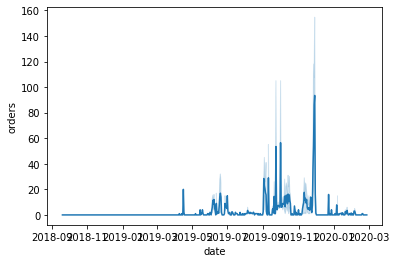

In [17]:
sns.lineplot(x = 'date', y = 'orders', data = df)

Convert seasonal categorical variables to dummy

In [18]:
vars_cat = ['weekday', 'month', 'day']
df_cat_dummy = pd.get_dummies(df, columns = vars_cat, drop_first=True)

Split traning and test samples

In [19]:
date_min = df['date'].min()
print(date_min)
date_max = df['date'].max()
print(date_max)
n_days_total =  len(df['date'].unique())
print(n_days_total)

2018-09-19 00:00:00
2020-02-27 00:00:00
527


In [20]:
#for time-series it's not a good idea subset train and test datasets randonly, because time is a important feature.
#n_test = number os rows used in test dataset.
n_test = 0.2                
n_train = len(df_cat_dummy) * (1-n_test)
n_train = int(n_train)

train = df_cat_dummy.iloc[0:n_train, :].reset_index()
test  = df_cat_dummy.iloc[n_train:, :].reset_index()


Lets try a simple linear regression

I drop the seasonal dummies for month and day because we dont have data for all possibilities.

R2:0.4430979990591948
MAE:5.571523991674564


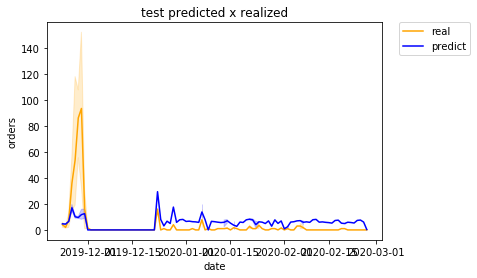

In [34]:
y = 'orders'
x = ['competition_price', 'olist_price', 'freight_value',
       'stock_avg', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6']

mod0 = linear_model.LinearRegression()
mod0.fit(train.loc[:,x], train.loc[:,y])
mod0_pred = mod0.predict(test.loc[:,x])

#converting all predict values <0 -> =0
mod0_pred_c = []
for i in range(len(mod0_pred)):
    if mod0_pred[i] <0:
        mod0_pred_c.append(0)
    else:
        mod0_pred_c.append(mod0_pred[i])
    

r2 = metrics.r2_score(train.loc[:,y], mod0.predict(train.loc[:,x]))
median_absolute_error = metrics.median_absolute_error(test.loc[:,y], mod0_pred_c)
print('R2:' + str(r2))
print('MAE:' + str(median_absolute_error))

y_1 = test['orders']
y_2 = mod0_pred_c
x_data = test['date']
sns.lineplot(x = x_data, y = y_1, color = 'orange')
sns.lineplot(x = x_data, y = y_2, color = 'b')
plt.title('test predicted x realized')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., labels = ['real', 'predict'])

Trying to improve the r2. First let's calculate price_ratio (price / competition_price) and freight_ratio (freight / price). Intead of use competition_price, price and freight, we run with price_ratio and freight_ratio. Very poor results.

In [31]:
df_cat_dummy['price_ratio'] = df_cat_dummy['olist_price'] / df_cat_dummy['competition_price']
df_cat_dummy['freight_ratio'] = df_cat_dummy['freight_value'] / df_cat_dummy['olist_price']

R2:0.06442487183413093
MAE:3.811262829557145


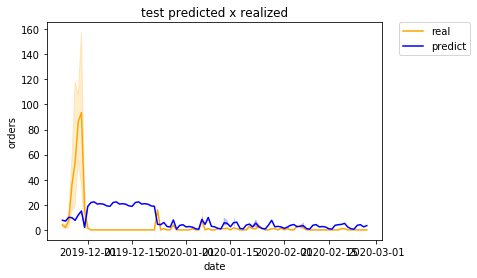

In [86]:
#for time-series it's not a good idea subset train and test datasets randonly, because time is a important feature.
#n_test = number os rows used in test dataset.
n_test = 0.2                
n_train = len(df_cat_dummy) * (1-n_test)
n_train = int(n_train)

train = df_cat_dummy.iloc[0:n_train, :].reset_index()
test  = df_cat_dummy.iloc[n_train:, :].reset_index()


y = 'orders'
x = ['price_ratio', 'freight_ratio',
       'stock_avg', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6']

mod0 = linear_model.LinearRegression()
mod0.fit(train.loc[:,x], train.loc[:,y])
mod0_pred = mod0.predict(test.loc[:,x])

#converting all predict values <0 -> =0
mod0_pred_c = []
for i in range(len(mod0_pred)):
    if mod0_pred[i] <0:
        mod0_pred_c.append(0)
    else:
        mod0_pred_c.append(mod0_pred[i])
    

r2 = metrics.r2_score(train.loc[:,y], mod0.predict(train.loc[:,x]))
median_absolute_error = metrics.median_absolute_error(test.loc[:,y], mod0_pred_c)
print('R2:' + str(r2))
print('MAE:' + str(median_absolute_error))

y_1 = test['orders']
y_2 = mod0_pred_c
x_data = test['date']
sns.lineplot(x = x_data, y = y_1, color = 'orange')
sns.lineplot(x = x_data, y = y_2, color = 'b')
plt.title('test predicted x realized')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., labels = ['real', 'predict'])

Back to the initial regression, let's calculate use lag variables, and rerun the regressions. We choose lags until 4 days. The results are worst than original.

In [92]:
#set the variables to lag
var_lag = ['competition_price', 'orders', 'olist_price', 'freight_value']

#set the number of lags
n_lag = [1, 2, 3, 4]

#loop to calculate the lags for var_lags
for col in var_lag:
    for lag in n_lag:
        df_cat_dummy.loc[:, col + str(-lag)] = df_cat_dummy.loc[:, col].shift(lag*-1) 

df_cat_dummy.dropna(inplace = True)

R2:0.13020660898684888
MAE:6.93402307876374


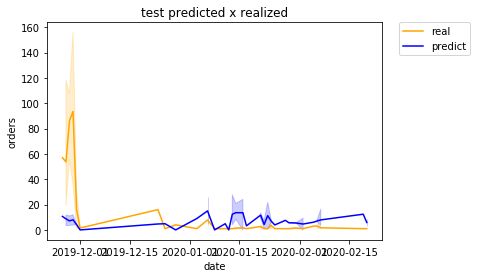

In [91]:
#for time-series it's not a good idea subset train and test datasets randonly, because time is a important feature.
#n_test = number os rows used in test dataset.
n_test = 0.2                
n_train = len(df_cat_dummy) * (1-n_test)
n_train = int(n_train)

train = df_cat_dummy.iloc[0:n_train, :].reset_index()
test  = df_cat_dummy.iloc[n_train:, :].reset_index()


y = 'orders'
x = ['price_ratio', 'freight_ratio',
       'stock_avg', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'competition_price-1', 'orders-1', 'olist_price-1', 'freight_value-1',
       'competition_price-2', 'orders-2', 'olist_price-2', 'freight_value-2',
       'competition_price-3', 'orders-3', 'olist_price-3', 'freight_value-3',
       'competition_price-4', 'orders-4', 'olist_price-4', 'freight_value-4']

mod0 = linear_model.LinearRegression()
mod0.fit(train.loc[:,x], train.loc[:,y])
mod0_pred = mod0.predict(test.loc[:,x])

#converting all predict values <0 -> =0
mod0_pred_c = []
for i in range(len(mod0_pred)):
    if mod0_pred[i] <0:
        mod0_pred_c.append(0)
    else:
        mod0_pred_c.append(mod0_pred[i])
    

r2 = metrics.r2_score(train.loc[:,y], mod0.predict(train.loc[:,x]))
median_absolute_error = metrics.median_absolute_error(test.loc[:,y], mod0_pred_c)
print('R2:' + str(r2))
print('MAE:' + str(median_absolute_error))

y_1 = test['orders']
y_2 = mod0_pred_c
x_data = test['date']
sns.lineplot(x = x_data, y = y_1, color = 'orange')
sns.lineplot(x = x_data, y = y_2, color = 'b')
plt.title('test predicted x realized')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., labels = ['real', 'predict'])

Let's try the same as before (lags features) with regularization L1, L2 and elasticnet

R2:0.1302066060999293
MAE:6.935587879199554


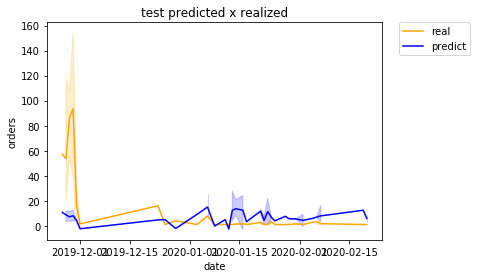

In [102]:
#L1

y = 'orders'
x = ['price_ratio', 'freight_ratio',
       'stock_avg', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'competition_price-1', 'orders-1', 'olist_price-1', 'freight_value-1',
       'competition_price-2', 'orders-2', 'olist_price-2', 'freight_value-2',
       'competition_price-3', 'orders-3', 'olist_price-3', 'freight_value-3',
       'competition_price-4', 'orders-4', 'olist_price-4', 'freight_value-4']

# Fitting the model
mod = linear_model.Lasso(alpha=0.00001, fit_intercept=True)
mod.fit(train.loc[:,x], train.loc[:,y])
mod_pred = mod.predict(test.loc[:,x])

r2 = metrics.r2_score(train.loc[:,y], mod.predict(train.loc[:,x]))
median_absolute_error = metrics.median_absolute_error(test.loc[:,y], mod_pred)
print('R2:' + str(r2))
print('MAE:' + str(median_absolute_error))

y_1 = test['orders']
y_2 = mod_pred
x_data = test['date']
sns.lineplot(x = x_data, y = y_1, color = 'orange')
sns.lineplot(x = x_data, y = y_2, color = 'b')
plt.title('test predicted x realized')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., labels = ['real', 'predict'])


R2:0.11306871296365473
MAE:7.132028026247481


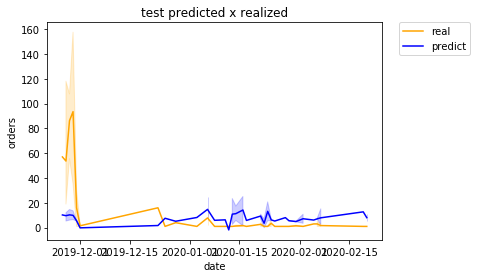

In [103]:
#L2

y = 'orders'
x = ['price_ratio', 'freight_ratio',
       'stock_avg', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'competition_price-1', 'orders-1', 'olist_price-1', 'freight_value-1',
       'competition_price-2', 'orders-2', 'olist_price-2', 'freight_value-2',
       'competition_price-3', 'orders-3', 'olist_price-3', 'freight_value-3',
       'competition_price-4', 'orders-4', 'olist_price-4', 'freight_value-4']

# Fitting the model
mod = linear_model.Ridge(alpha=46.2, fit_intercept=True) # higher alpha for stronger regularization
mod.fit(train.loc[:,x], train.loc[:,y])
mod_pred = mod.predict(test.loc[:,x])

r2 = metrics.r2_score(train.loc[:,y], mod.predict(train.loc[:,x]))
median_absolute_error = metrics.median_absolute_error(test.loc[:,y], mod_pred)
print('R2:' + str(r2))
print('MAE:' + str(median_absolute_error))

y_1 = test['orders']
y_2 = mod_pred
x_data = test['date']
sns.lineplot(x = x_data, y = y_1, color = 'orange')
sns.lineplot(x = x_data, y = y_2, color = 'b')
plt.title('test predicted x realized')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., labels = ['real', 'predict'])


R2:0.0948067904983273
MAE:5.867381183287208


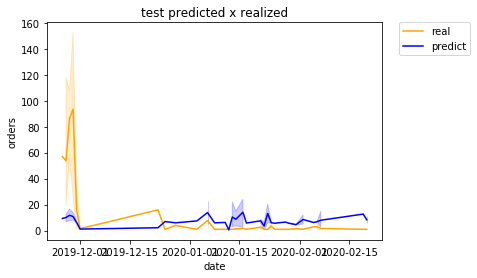

In [105]:
#L2

y = 'orders'
x = ['price_ratio', 'freight_ratio',
       'stock_avg', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'competition_price-1', 'orders-1', 'olist_price-1', 'freight_value-1',
       'competition_price-2', 'orders-2', 'olist_price-2', 'freight_value-2',
       'competition_price-3', 'orders-3', 'olist_price-3', 'freight_value-3',
       'competition_price-4', 'orders-4', 'olist_price-4', 'freight_value-4']

# Fitting the model
mod = linear_model.ElasticNet(random_state=0, alpha=1, l1_ratio=0.5, fit_intercept=True)
mod.fit(train.loc[:,x], train.loc[:,y])
mod_pred = mod.predict(test.loc[:,x])

r2 = metrics.r2_score(train.loc[:,y], mod.predict(train.loc[:,x]))
median_absolute_error = metrics.median_absolute_error(test.loc[:,y], mod_pred)
print('R2:' + str(r2))
print('MAE:' + str(median_absolute_error))

y_1 = test['orders']
y_2 = mod_pred
x_data = test['date']
sns.lineplot(x = x_data, y = y_1, color = 'orange')
sns.lineplot(x = x_data, y = y_2, color = 'b')
plt.title('test predicted x realized')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., labels = ['real', 'predict'])
